In [1]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

nnfs.init()

In [2]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        #weights shape = (n_inputs, n_neurons)
        self.weights = .01*np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, input):
        #input shape = (1, len(input))
        self.output = np.dot(input, self.weights) + self.biases

X, y = spiral_data(samples=100, classes = 3)

#create a layer with 2 input features and 3 neutrons
#input shape (300,2)
#layer shape (2,3)
#(300,2) *(2,3) = (300, 3)
layer1 = Layer_Dense(2, 3)

#forward pass
layer1.forward(X)


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

activation1 = Activation_ReLU()
activation1.forward(layer1.output) #(300,3) after running through relu
#activation1.output[:5] #debug

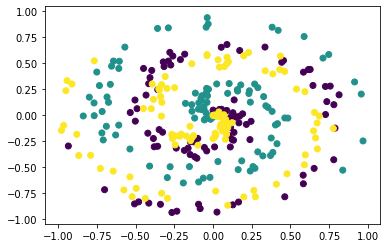

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [19]:
temp = [100, 101, 102, 103]

In [20]:
def softmax(arr):
    res = []
    temp = 0
    #get e**s_j
    for i in arr:
        temp = temp + np.e**i
    for i in arr:
        res.append((np.e**i)/temp)
    return res

In [21]:
print(softmax(temp))

[0.032058603280084995, 0.08714431874203259, 0.23688281808991016, 0.6439142598879724]


In [22]:
res = softmax(temp)
res = np.array(res)
res.sum()

1.0

In [23]:
exp_values = np.exp(temp)
probabilities = exp_values / np.sum(exp_values)

In [24]:
probabilities

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])